In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection

In [ ]:
import requests

# URLs of the files
data_url = 'https://www.raphaelcousin.com/modules/module6/exercise/House Price India.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(data_url, 'House Price India.csv')

In [42]:
df = pd.read_csv('House Price India.csv')

In [43]:
df = df.iloc[:100]

## Data Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     100 non-null    int64  
 1   Date                                   100 non-null    int64  
 2   number of bedrooms                     100 non-null    int64  
 3   number of bathrooms                    100 non-null    float64
 4   living area                            100 non-null    int64  
 5   lot area                               100 non-null    int64  
 6   number of floors                       100 non-null    float64
 7   waterfront present                     100 non-null    int64  
 8   number of views                        100 non-null    int64  
 9   condition of the house                 100 non-null    int64  
 10  grade of the house                     100 non-null    int64  
 11  Area of

In [45]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [46]:
df.nunique()

id                                       100
Date                                       4
number of bedrooms                         6
number of bathrooms                       12
living area                               82
lot area                                  95
number of floors                           5
waterfront present                         1
number of views                            5
condition of the house                     4
grade of the house                         7
Area of the house(excluding basement)     79
Area of the basement                      36
Built Year                                64
Renovation Year                            5
Postal Code                               47
Lattitude                                 98
Longitude                                 89
living_area_renov                         83
lot_area_renov                            91
Number of schools nearby                   3
Distance from the airport                 30
Price     

In [47]:
df = df.drop(['id', 'Date'], axis=1)

In [48]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer

# Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [50]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming X and y are your feature matrix and target vector
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor(n_jobs=-1)),
    ('XGBoost', XGBRegressor(n_jobs=-1)),
    ('LightGBM', LGBMRegressor(n_jobs=-1)),
    ('CatBoost', CatBoostRegressor( verbose=False))
]

results = []

for name, model in models:
    
    # Perform cross-validation
    # mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    results.append({
        'Model': name,
        'CV MSE': -mse_scores
    })
    
    print(f"{name}:")
    # print(f"  Cross-validation MAE: {-mae_scores.mean():.4f} (+/- {mae_scores.std() * 2:.4f})")
    print(f"  Cross-validation MSE: {-mse_scores.mean():.4f} (+/- {mse_scores.std() * 2:.4f})")
    print()

# Convert results to a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)

Linear Regression:
  Cross-validation MSE: 40938688015.5776 (+/- 53964356051.9164)

Ridge:
  Cross-validation MSE: 43179705268.5866 (+/- 66252864770.7450)

Lasso:
  Cross-validation MSE: 40912096621.8095 (+/- 53893555593.8921)

ElasticNet:
  Cross-validation MSE: 93970872220.9113 (+/- 164354282392.7490)

Decision Tree:
  Cross-validation MSE: 79391749759.2400 (+/- 92510214511.3393)

SVR:
  Cross-validation MSE: 125356142107.6409 (+/- 173390398498.5709)

KNN:
  Cross-validation MSE: 80175781475.3920 (+/- 122502323866.6169)



/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.371e+11, tolerance: 8.033e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.213e+11, tolerance: 8.852e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Random Forest:
  Cross-validation MSE: 55425706463.5119 (+/- 108365103702.7212)

XGBoost:
  Cross-validation MSE: 53774794065.5782 (+/- 103938599088.5238)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 17
[LightGBM] [Info] Start training from score 571939.050000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

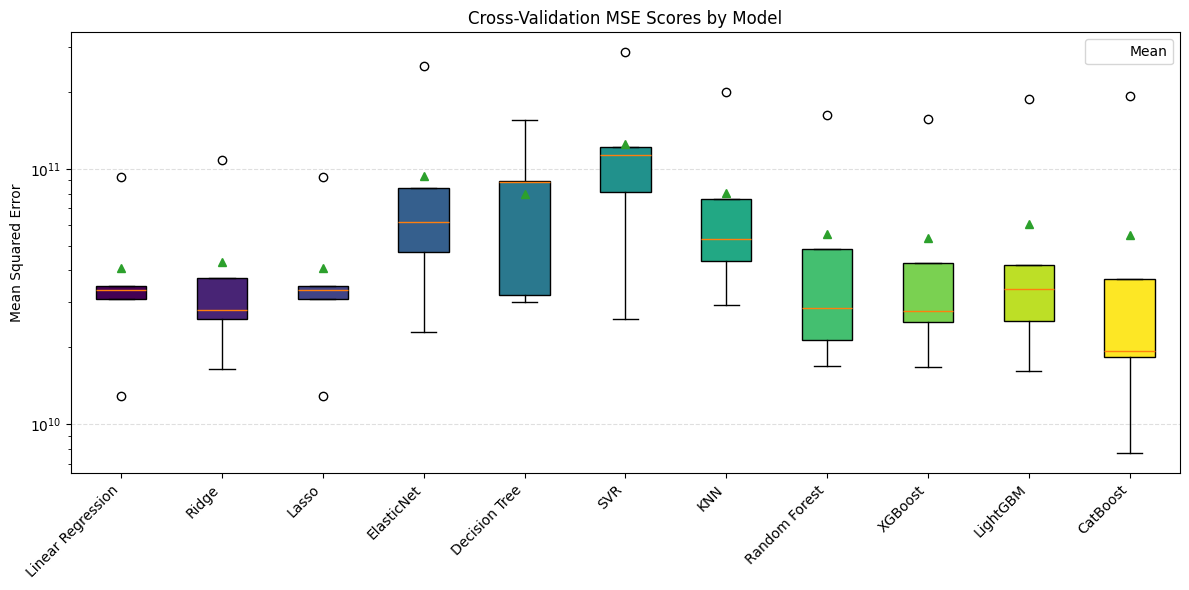

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot
bp = ax.boxplot(results_df['CV MSE'], patch_artist=True, showmeans=True)

# Customize box colors
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df['Model'])))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Customize plot
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Cross-Validation MSE Scores by Model')
ax.set_yscale('log')  # Use log scale for better visualization if scores vary widely

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Add legend for mean
mean_patch = plt.Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', label='Mean')
ax.legend([mean_patch], ['Mean'], loc='upper right')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Split data into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def optimize_model(model, param_space, X, y):
    if not param_space:  # If param_space is empty, just fit the model
        model.fit(X, y)
        mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        y_pred = model.predict(X)
        mse = mean_squared_error(y, y_pred)
        return model, mse, {}
    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=5,
        cv=5,
        n_jobs=-1,
        scoring='neg_mean_squared_error'
    )
    opt.fit(X, y)
    return opt.best_estimator_, -opt.best_score_, opt.best_params_


models = [
    # ('Linear Regression', LinearRegression(), None),
    ('Ridge', Ridge(), {'alpha': Real(1e-6, 1e+6, prior='log-uniform')}),
    ('Lasso', Lasso(), {'alpha': Real(1e-6, 1e+6, prior='log-uniform')}),
    # ('ElasticNet', ElasticNet(), {
    #     'alpha': Real(1e-6, 1e+6, prior='log-uniform'),
    #     'l1_ratio': Real(0, 1, prior='uniform')
    # }),
    # ('Decision Tree', DecisionTreeRegressor(), {
    #     'max_depth': Integer(1, 32),
    #     'min_samples_split': Integer(2, 20),
    #     'min_samples_leaf': Integer(1, 20)
    # }),
    ('SVR', SVR(), {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'epsilon': Real(1e-6, 1, prior='log-uniform'),
        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid'])
    }),
    ('KNN', KNeighborsRegressor(), {
        'n_neighbors': Integer(1, 50),
        'weights': Categorical(['uniform', 'distance']),
        'p': Integer(1, 2)
    }),
    ('Random Forest', RandomForestRegressor(n_jobs=-1), {
        'n_estimators': Integer(10, 1000),
        'max_depth': Integer(1, 32),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 20)
    }),
    # ('XGBoost', XGBRegressor(n_jobs=-1), {
    #     'n_estimators': Integer(10, 1000),
    #     'max_depth': Integer(1, 32),
    #     'learning_rate': Real(1e-3, 1, prior='log-uniform'),
    #     'subsample': Real(0.1, 1, prior='uniform'),
    #     'colsample_bytree': Real(0.1, 1, prior='uniform')
    # }),
    # ('LightGBM', LGBMRegressor(n_jobs=-1), {
    #     'n_estimators': Integer(10, 1000),
    #     'max_depth': Integer(1, 32),
    #     'learning_rate': Real(1e-3, 1, prior='log-uniform'),
    #     'subsample': Real(0.1, 1, prior='uniform'),
    #     'colsample_bytree': Real(0.1, 1, prior='uniform')
    # })
]

results = []

for name, model, param_space in models:
    print(f"Optimizing {name}...")
    
    # Optimize hyperparameters using cross-validation on train+val set
    best_model, best_cv_mse, best_params = optimize_model(model, param_space, X_train_val, y_train_val)
    
    # Retrain best model on entire train+val set
    best_model.fit(X_train_val, y_train_val)
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        'Model': name,
        'CV MSE': best_cv_mse,
        'test_mse':test_mse,
        'best_model': best_model,
        'Best Parameters': best_params if best_params else "N/A"
    })
    
    print(f"{name}:")
    print(f"  Cross-validation MSE: {best_cv_mse}")
    print(f"  Test MSE: {test_mse:.4f}")
    print(f"  Best Parameters: {best_params if best_params else 'N/A'}")
    print()

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

Optimizing Ridge...
Ridge:
  Cross-validation MSE: 18010710456.13707
  Test MSE: 82207992123.0365
  Best Parameters: OrderedDict([('alpha', 0.2944249233408235)])

Optimizing Lasso...
Lasso:
  Cross-validation MSE: 23746444366.39745
  Test MSE: 78272692461.6893
  Best Parameters: OrderedDict([('alpha', 3.863945096245966)])

Optimizing SVR...
SVR:
  Cross-validation MSE: 28063646681.107765
  Test MSE: 106944094181.0424
  Best Parameters: OrderedDict([('C', 47198.31308955523), ('epsilon', 2.3392326599516646e-05), ('kernel', 'poly')])

Optimizing KNN...


/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+11, tolerance: 6.195e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+11, tolerance: 2.950e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

KNN:
  Cross-validation MSE: 49823809426.69128
  Test MSE: 96691727742.0239
  Best Parameters: OrderedDict([('n_neighbors', 7), ('p', 1), ('weights', 'distance')])

Optimizing Random Forest...
Random Forest:
  Cross-validation MSE: 49610783587.9044
  Test MSE: 88063468016.6812
  Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_leaf', 5), ('min_samples_split', 14), ('n_estimators', 965)])

           Model        CV MSE      test_mse  \
0          Ridge  1.801071e+10  8.220799e+10   
1          Lasso  2.374644e+10  7.827269e+10   
2            SVR  2.806365e+10  1.069441e+11   
3            KNN  4.982381e+10  9.669173e+10   
4  Random Forest  4.961078e+10  8.806347e+10   

                                          best_model  \
0                    Ridge(alpha=0.2944249233408235)   
1                     Lasso(alpha=3.863945096245966)   
2  SVR(C=47198.31308955523, epsilon=2.33923265995...   
3  KNeighborsRegressor(n_neighbors=7, p=1, weight...   
4  (DecisionTreeRegressor

In [83]:
results_df

,Model,CV MSE,test_mse,best_model,Best Parameters
0,Ridge,1.801071e+10,8.220799e+10,Ridge(alpha=0.2944249233408235),{'alpha': 0.2944249233408235}
1,Lasso,2.374644e+10,7.827269e+10,Lasso(alpha=3.863945096245966),{'alpha': 3.863945096245966}
2,SVR,2.806365e+10,1.069441e+11,"SVR(C=47198.31308955523, epsilon=2.33923265995...","{'C': 47198.31308955523, 'epsilon': 2.33923265..."
3,KNN,4.982381e+10,9.669173e+10,"KNeighborsRegressor(n_neighbors=7, p=1, weight...","{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}"
4,Random Forest,4.961078e+10,8.806347e+10,"(DecisionTreeRegressor(max_depth=16, max_featu...","{'max_depth': 16, 'min_samples_leaf': 5, 'min_..."


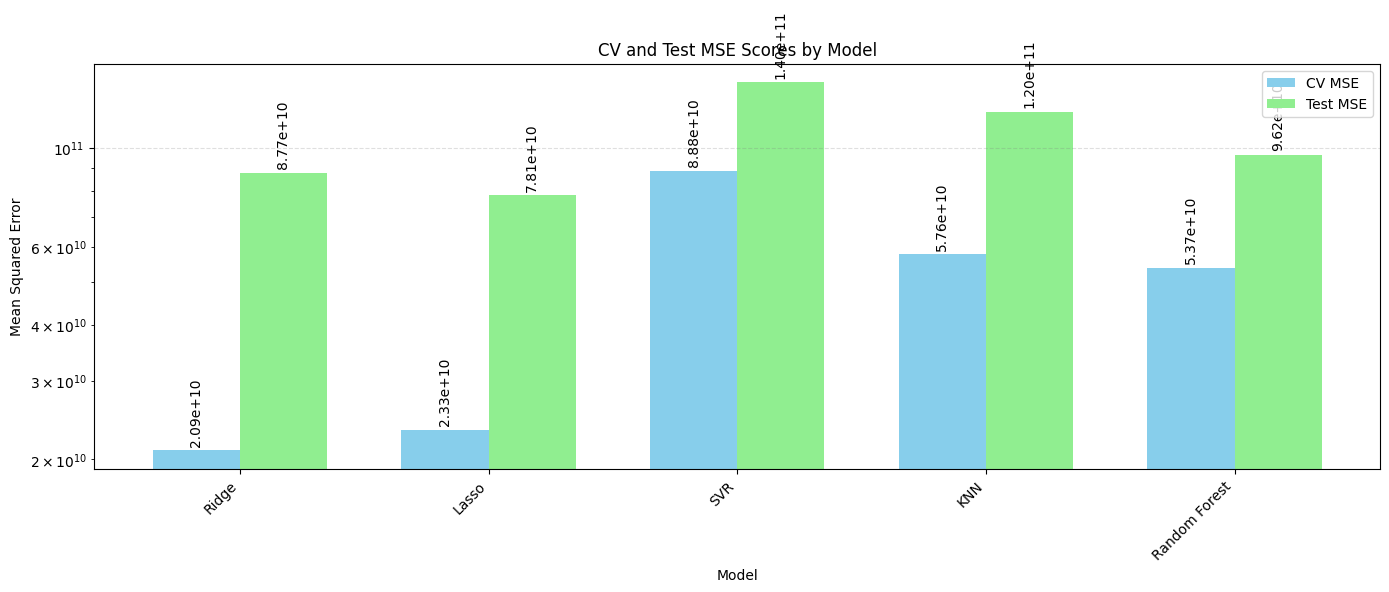

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Prepare data
models = results_df['Model']
cv_mse = results_df['CV MSE']
test_mse = results_df['test_mse']

# Number of models
N = len(models)

# Position of bars on x-axis
ind = np.arange(N)

# Width of a bar 
width = 0.35       

# Plot bars
bar1 = ax.bar(ind - width/2, cv_mse, width, label='CV MSE', color='skyblue')
bar2 = ax.bar(ind + width/2, test_mse, width, label='Test MSE', color='lightgreen')

# Customize plot
ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('CV and Test MSE Scores by Model')
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_yscale('log')  # Use log scale for better visualization if scores vary widely

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Add legend
ax.legend()

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2e}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(bar1)
autolabel(bar2)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [92]:
best_models['best_model'].values

array([Lasso(alpha=3.863945096245966), Ridge(alpha=0.2944249233408235),
       RandomForestRegressor(max_depth=16, min_samples_leaf=5, min_samples_split=14,
                             n_estimators=965, n_jobs=-1)                           ,
       KNeighborsRegressor(n_neighbors=7, p=1, weights='distance'),
       SVR(C=47198.31308955523, epsilon=2.3392326599516646e-05, kernel='poly')],
      dtype=object)

In [124]:
from sklearn.ensemble import BaggingRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score

# Assume 'results_df' contains the results from our previous model evaluation
# Sort models by Test MSE to get the best performing ones
best_models = results_df.sort_values('test_mse').head(5)

# Initialize lists to store our base models
base_models = []
for _, row in best_models.iterrows():
    base_models.append((row['Model'], row['best_model']))

# Bagging
print("Training Bagging Regressor...")
bagging = BaggingRegressor(estimator=base_models[0][1], n_estimators=10, random_state=42)
bagging.fit(X_train_val, y_train_val)
bagging_pred = bagging.predict(X_test)
bagging_mse = mean_squared_error(y_test, bagging_pred)

# Stacking
print("Training Stacking Regressor...")
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)
stacking.fit(X_train_val, y_train_val)
stacking_pred = stacking.predict(X_test)
stacking_mse = mean_squared_error(y_test, stacking_pred)

# Add results to our results dataframe
new_results = pd.DataFrame([
    {
        'Model': 'Bagging',
        'CV MSE': np.mean(-cross_val_score(bagging, X_train_val, y_train_val, scoring='neg_mean_squared_error', cv=5)),
        'Test MSE': bagging_mse,
        'Best Parameters': 'N/A'
    },
    {
        'Model': 'Stacking',
        'CV MSE': np.mean(-cross_val_score(stacking, X_train_val, y_train_val, scoring='neg_mean_squared_error', cv=5)),
        'Test MSE': stacking_mse,
        'Best Parameters': 'N/A'
    }
])


Training Bagging Regressor...
Training Stacking Regressor...


/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.388e+10, tolerance: 9.101e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.003e+10, tolerance: 9.636e+08
  model = cd_fast.enet_coordinate_descent(
/home/raphael/admin_data_science_practice/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [125]:
new_results

,Model,CV MSE,Test MSE,Best Parameters
0,Bagging,2.332827e+10,7.668758e+10,N/A
1,Stacking,2.028634e+10,8.328463e+10,N/A
